In [1]:
import sys
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List


sys.path.append('../')
from vis_utils import plot_pr_eval

In [12]:

def plot_pr_eval(
    data_key: str = 'brain',
    # data_key: str = 'heart',

    architectures: List[str] = [
        'ResDAE-8',
        'ResDAE-32',
        'ResDAE-64',
    ],
    unets: List[str] = [
        # 'default-8', 
        # 'default-16', 
        'monai-8-4-4',
        # 'monai-16-4-4',
        # 'monai-16-4-8',
        # 'monai-32-4-4',
        # 'monai-64-4-4',
        # 'swinunetr'
    ],
    debug: bool = False,
):
    dfs = []
    load_dir = '../../results-tmp/dae-data/'
    for arch in architectures:
        for unet in unets:
            file_name = f'{data_key}_{arch}_{unet}_0.csv'
            if debug:
                file_name = 'debug_' + file_name
            df_tmp = pd.read_csv(
                load_dir + file_name
            )
            df_tmp['method'] = arch
            dfs.append(df_tmp)
    df = pd.concat(dfs)

    if len(unets) == 1:
        df['method_with_auc'] = df.apply(lambda row: f"{row['method']} ({row['pr_auc']:.3f})", axis=1)
    df['domain'] = df['domain'].str.replace('_subset', '', regex=False)

    # df['method'] = df['method'].apply(lambda x: c)

    # Creating the figure and axes for the subplots
    n = df['domain'].nunique()
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))

    for i, domain in enumerate(df['domain'].unique()):
        
        sns.lineplot(
            data=df[df['domain'] == domain], 
            x='recall',
            y='precision', 
            hue='method_with_auc' if len(unets) == 1 else 'method',
            style='unet',
            ax=axes[i]
        )
        axes[i].set_title(f'Domain {domain}')
        axes[i].set_ylim(0, 1)

    fig.suptitle(f'{data_key.capitalize()} Data', fontsize=16)
    # plt.close(fig)

    return fig

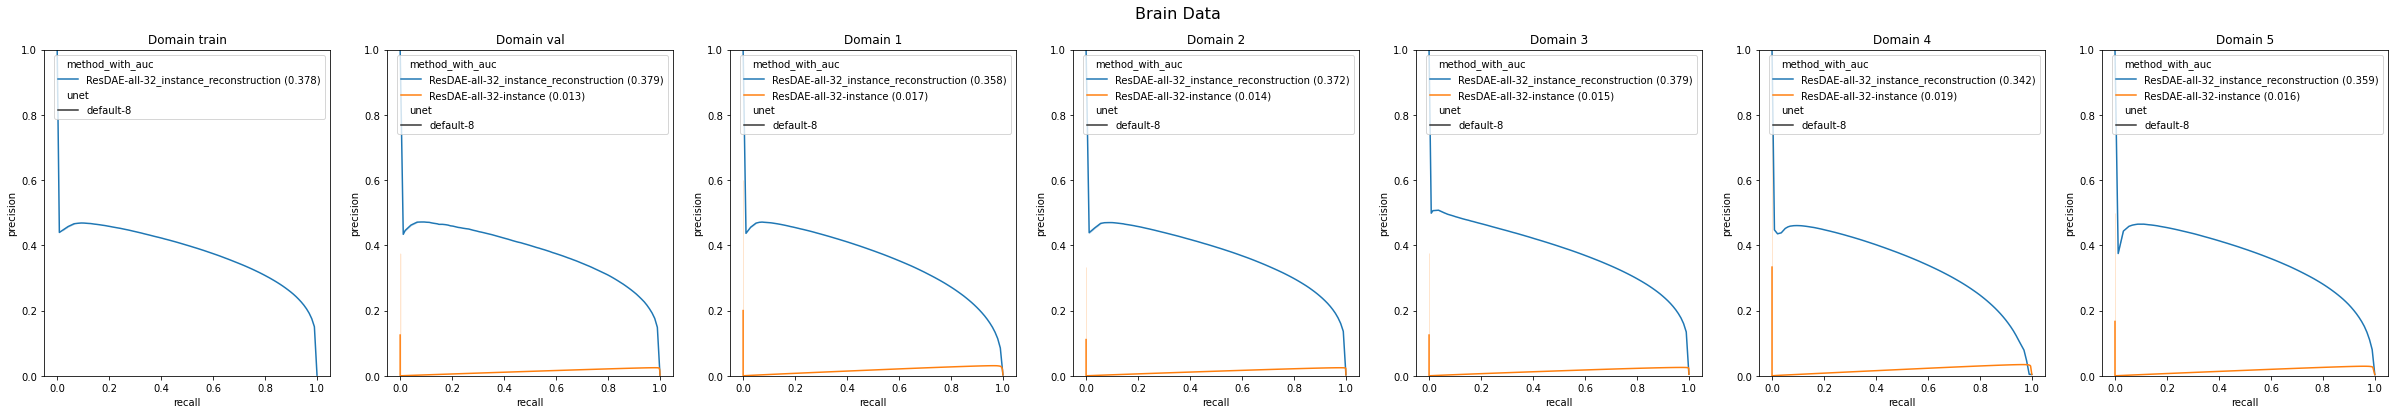

In [43]:
p = plot_pr_eval(
    data_key='brain',
    architectures= [
        'ResDAE-all-32_instance_reconstruction',
        'ResDAE-all-32-instance'
    ],
    unets = [
        'default-8',
    ],
    debug=False
)

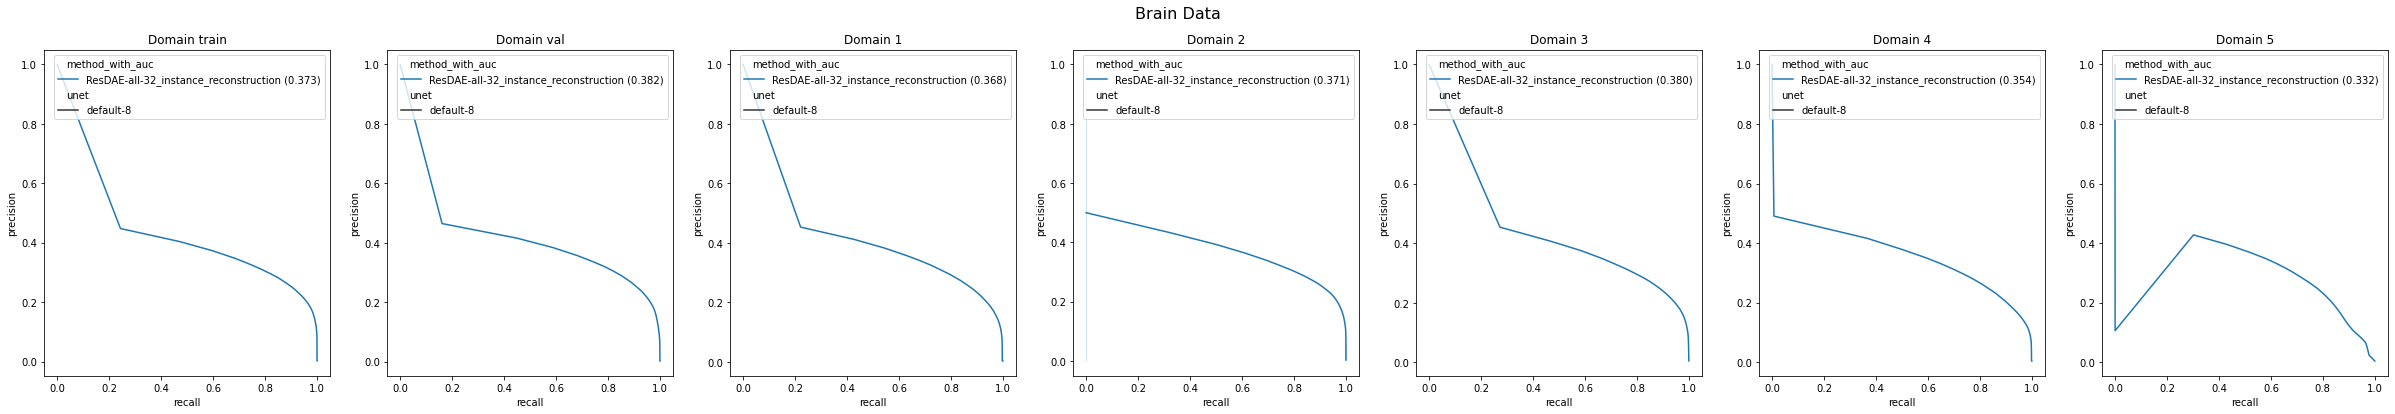

In [8]:
p = plot_pr_eval(
    data_key='brain',
    architectures= [
        'ResDAE-all-32_instance_reconstruction',
    ],
    unets = [
        'default-8',
    ],
    debug=True
)

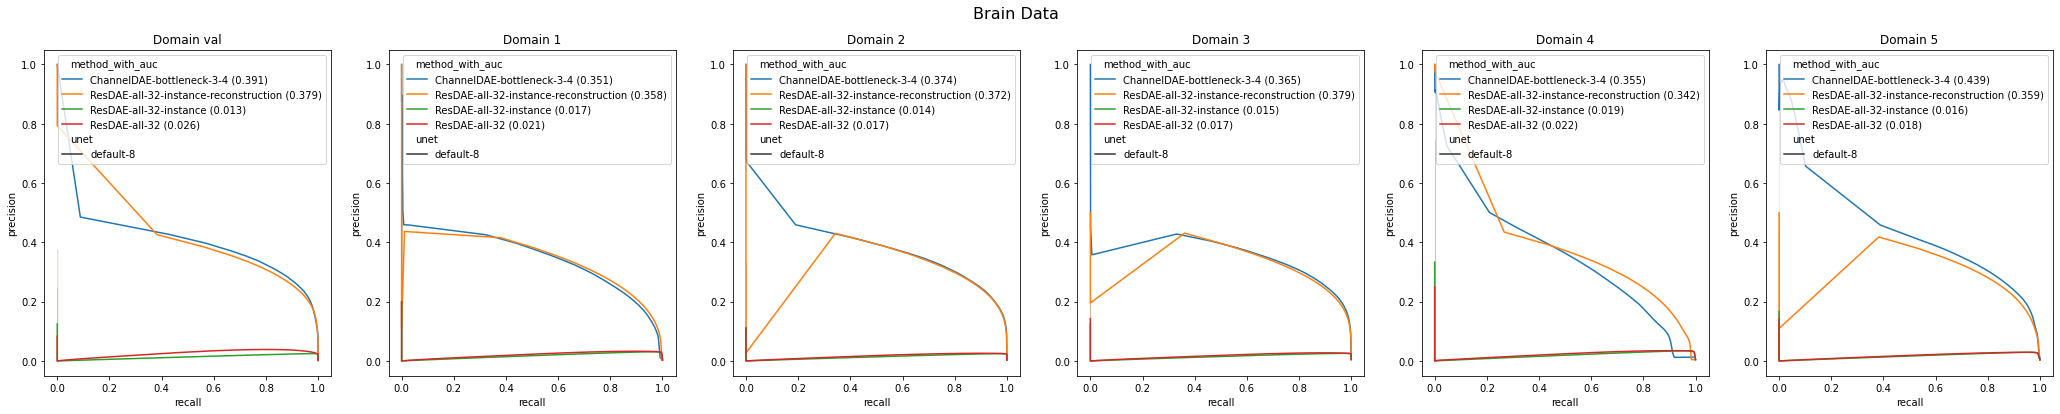

In [15]:
instance_brain_default = {
    data_key: plot_pr_eval(
        data_key=data_key,
        architectures= [
            'ChannelDAE-bottleneck-3-4',
            'ResDAE-all-32-instance-reconstruction',
            'ResDAE-all-32-instance',
            'ResDAE-all-32',
        ],
        unets = [
            'default-8',
        ],
    ) for data_key in ['brain']
}

for key in instance_brain_default:
    instance_brain_default[key].savefig(f'../../results/ae/eval/instance_brain_default-{key}_23-2-24.jpg',  bbox_inches='tight')

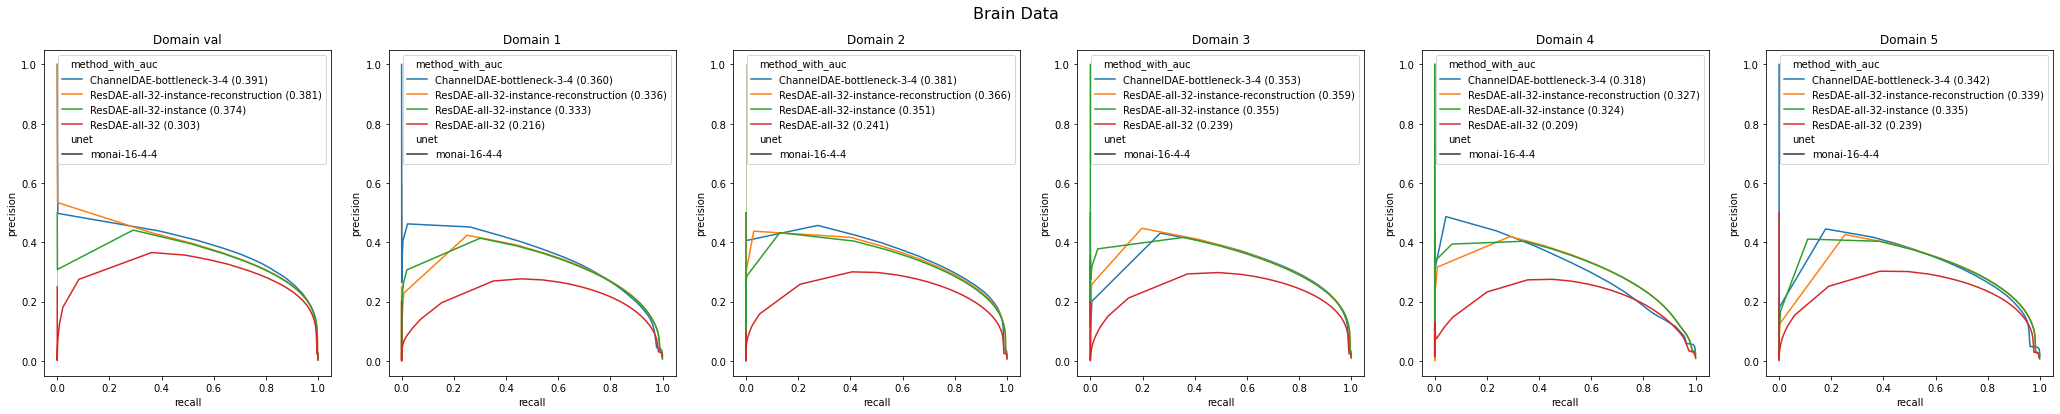

In [16]:
instance_brain_monai = {
    data_key: plot_pr_eval(
        data_key=data_key,
        architectures= [
            'ChannelDAE-bottleneck-3-4',
            'ResDAE-all-32-instance-reconstruction',
            'ResDAE-all-32-instance',
            'ResDAE-all-32',
        ],
        unets = [
            'monai-16-4-4',
        ],
    ) for data_key in ['brain']
}

for key in instance_brain_monai:
    instance_brain_monai[key].savefig(f'../../results/ae/eval/instance_brain_monai-{key}_23-2-24.jpg',  bbox_inches='tight')

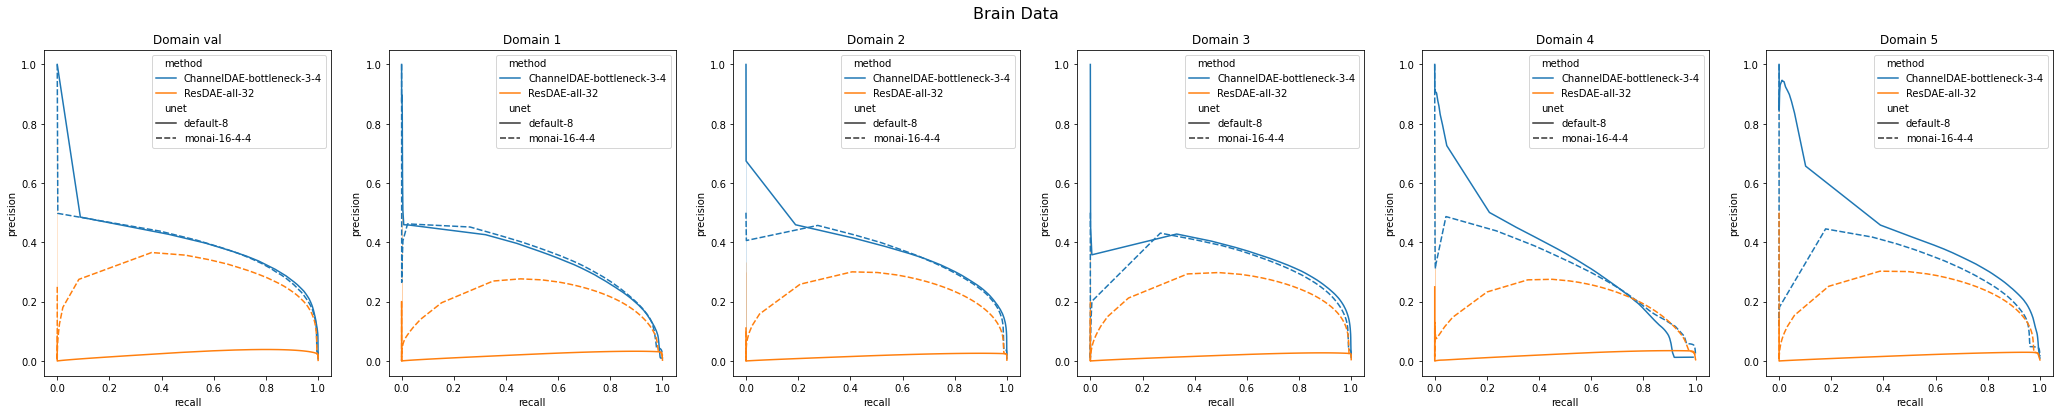

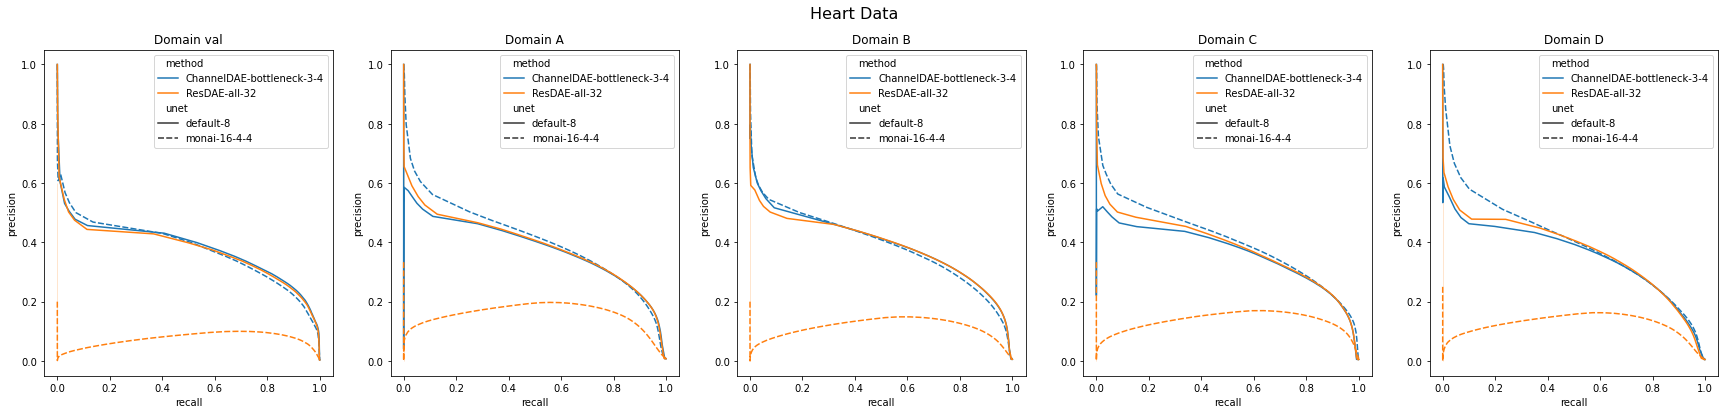

In [8]:
default_monai = {
    data_key: plot_pr_eval(
        data_key=data_key,
        architectures= [
            'ChannelDAE-bottleneck-3-4',
            'ResDAE-all-32'
        ],
        unets = [
            'default-8', 
            'monai-16-4-4',
        ],
    ) for data_key in ['brain', 'heart']
}

for key in default_monai:
    default_monai[key].savefig(f'../../results/unet/default-monai-{key}_23-2-24.png',  bbox_inches='tight')

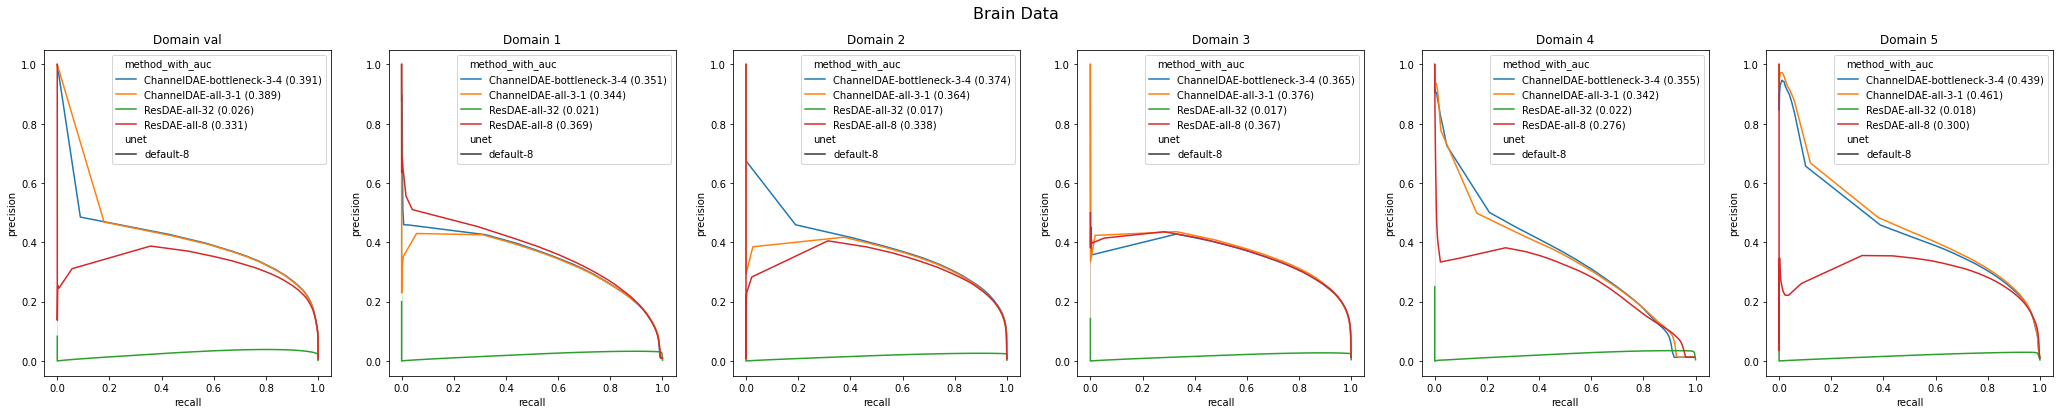

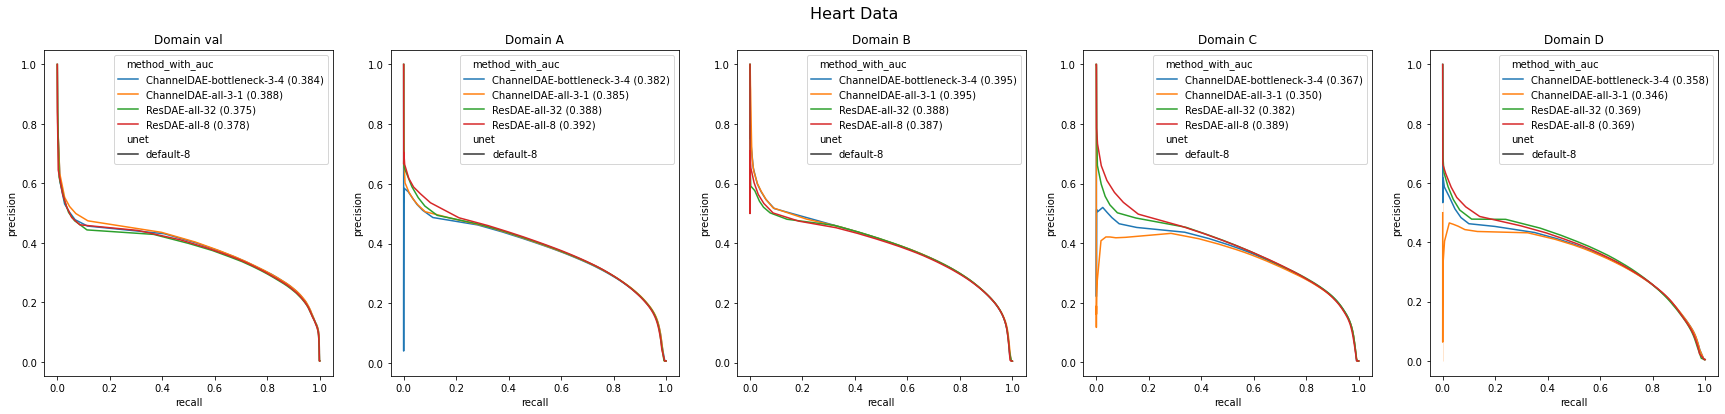

In [11]:
default8 = {
    data_key: plot_pr_eval(
        data_key=data_key,
        architectures= [
            'ChannelDAE-bottleneck-3-4',
            'ChannelDAE-all-3-1',
            'ResDAE-all-32',
            'ResDAE-all-8'
        ],
        unets = [
            'default-8', 
        ],
    ) for data_key in ['brain', 'heart']
}

for key in default8:
    default8[key].savefig(f'../../results/unet/default8-{key}_23-2-24.png',  bbox_inches='tight')

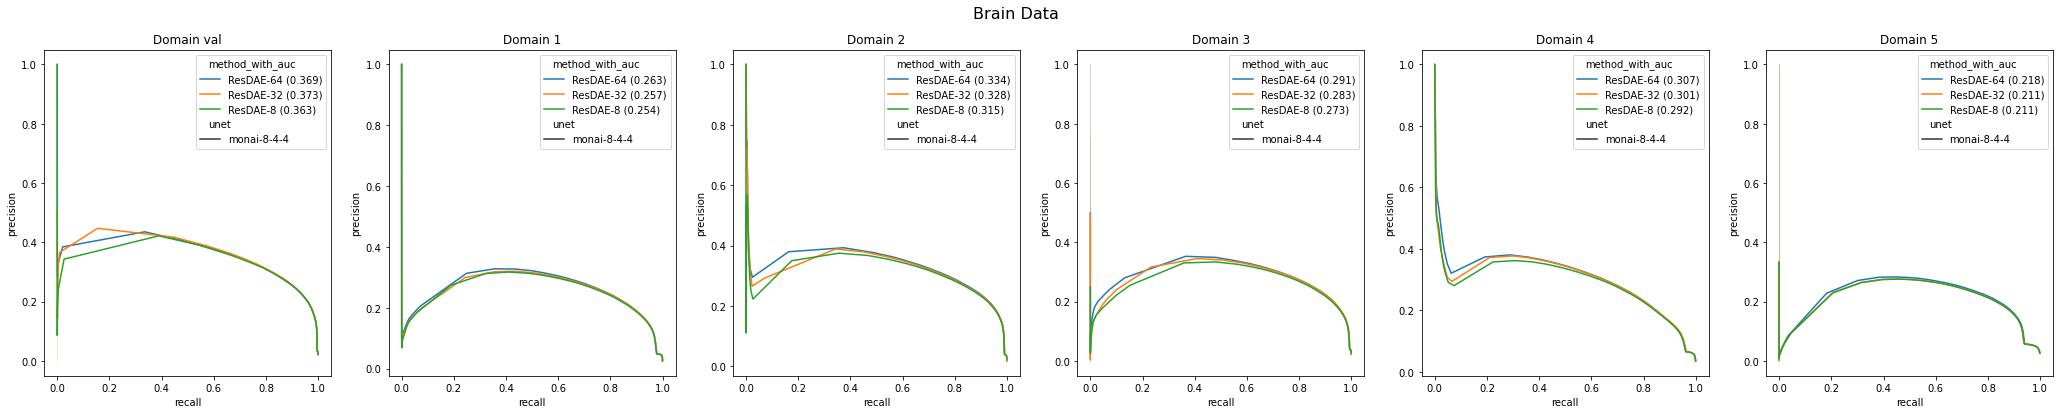

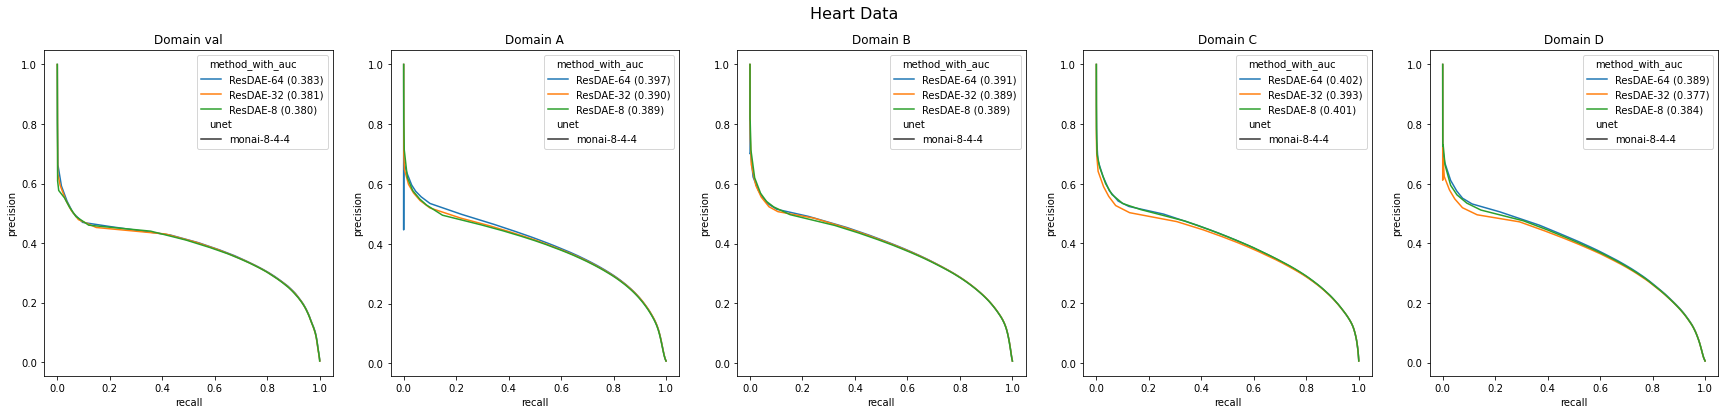

In [12]:
monai8 = {
    data_key: plot_pr_eval(
        data_key=data_key,
        architectures= [
            'ResDAE-64',
            'ResDAE-32',
            'ResDAE-8',
        ],
        unets = [
            'monai-8-4-4', 
        ],
    ) for data_key in ['brain', 'heart']
}

for key in monai8:
    monai8[key].savefig(f'../../results/unet/monai8-{key}_23-2-24.png',  bbox_inches='tight')

In [5]:
fig = monai8['brain']

In [6]:
fig
plt.show()

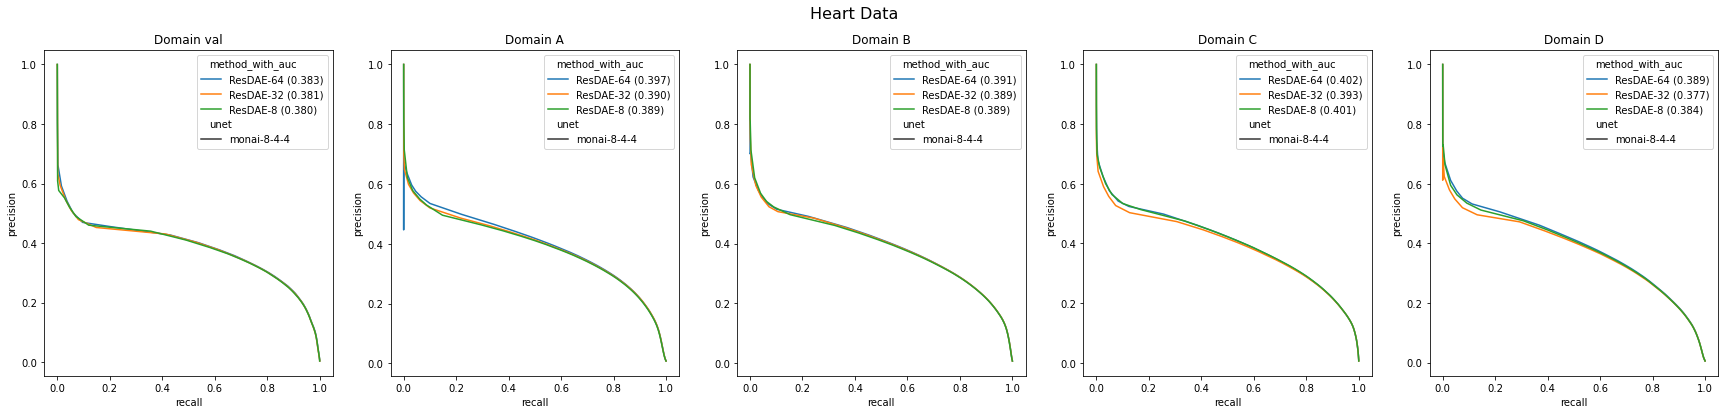

In [7]:
monai8['heart']

In [30]:
sorted_array = np.sort(np.random.rand(100) * 100)  # Example sorted array with random values
min_val, max_val = sorted_array[0], sorted_array[-1]
target_values = np.linspace(min_val, max_val, 10)

In [31]:
target_values.shape

(10,)

In [36]:
idx = np.abs(sorted_array[None, :] - target_values[:, None]).argmin(axis=1)

In [38]:
idx

array([ 0, 10, 19, 27, 39, 52, 65, 74, 85, 99])